In [13]:
#basic understanding of adaboost algorithm
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("Dry_Bean_Dataset.csv")

# Assume that all columns except "Class" are features
X = data.drop('Class', axis=1)
y = data['Class']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


ada=AdaBoostClassifier( random_state=42)
print("model default algorithm:", ada.algorithm)
# Train the model
ada.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada.predict(X_test)

# Evaluate the model
print("Train Accuracy:", accuracy_score(y_train, ada.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Create the AdaBoost Classifier
ada = AdaBoostClassifier(random_state=42,algorithm='SAMME')
print("model default algorithm:", ada.algorithm)
# Train the model
ada.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada.predict(X_test)

# Evaluate the model
print("Train Accuracy:", accuracy_score(y_train, ada.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#reason: samme.r algorithm needs relatively accurate probability information, while in this dataset, we only have the determined class labels.
#SAMME also wins when the dataset is small and imbalanced, which are exactly the conditions of this dataset.


model default algorithm: SAMME.R
Train Accuracy: 0.6488926209719744
Test Accuracy: 0.6466699314397649
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       395
      BOMBAY       0.00      0.00      0.00       161
        CALI       0.50      0.99      0.66       479
    DERMASON       0.63      0.95      0.76      1043
       HOROZ       0.92      0.76      0.83       588
       SEKER       0.95      0.20      0.32       619
        SIRA       0.77      0.76      0.77       799

    accuracy                           0.65      4084
   macro avg       0.54      0.52      0.48      4084
weighted avg       0.65      0.65      0.59      4084

model default algorithm: SAMME


c:\Users\angel\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\angel\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\angel\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 0.812742731185053
Test Accuracy: 0.80435847208619
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.85      0.37      0.52       395
      BOMBAY       1.00      0.22      0.36       161
        CALI       0.54      0.95      0.69       479
    DERMASON       0.89      0.85      0.87      1043
       HOROZ       0.96      0.90      0.93       588
       SEKER       0.83      0.92      0.87       619
        SIRA       0.84      0.83      0.83       799

    accuracy                           0.80      4084
   macro avg       0.84      0.72      0.72      4084
weighted avg       0.84      0.80      0.80      4084



c:\Users\angel\.conda\envs\pytorch\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train Accuracy: 0.899653616038627
Test Accuracy: 0.8805093046033301
Whole Dataset Accuracy: 0.20711189479097789
Classification Report (Test Data):
               precision    recall  f1-score   support

    BARBUNYA       0.90      0.88      0.89       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.90      0.85      0.87       479
    DERMASON       0.86      0.88      0.87      1043
       HOROZ       0.89      0.93      0.91       588
       SEKER       0.97      0.86      0.91       619
        SIRA       0.80      0.85      0.82       799

    accuracy                           0.88      4084
   macro avg       0.90      0.89      0.90      4084
weighted avg       0.88      0.88      0.88      4084



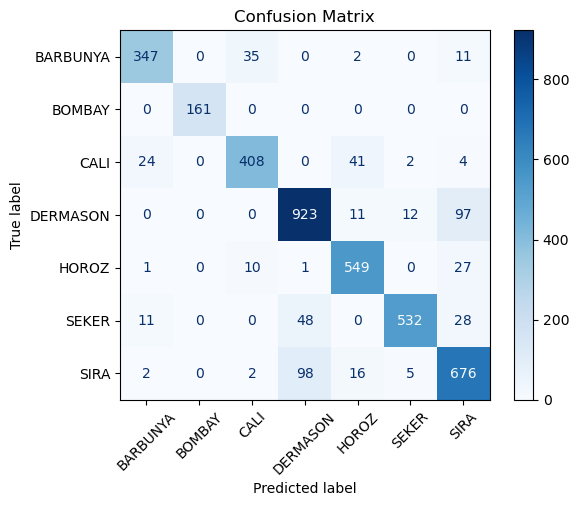

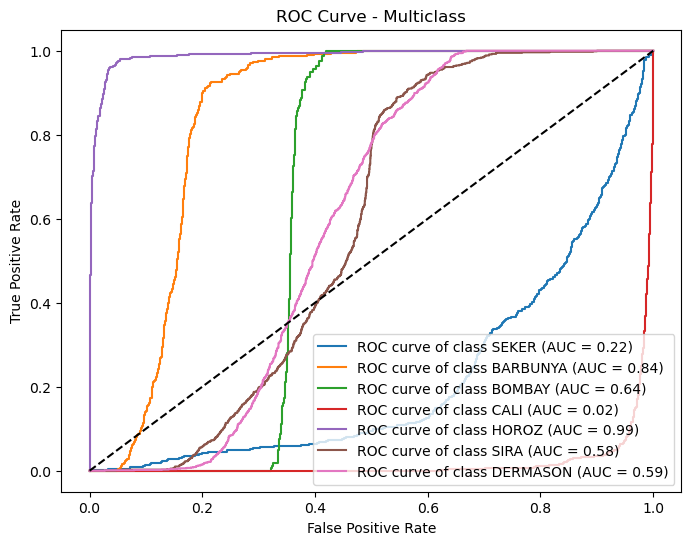

Average AUC: 0.5552673491815362


In [14]:
#find the best hyperparameters using grid search
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Update parameter grid to include base_estimator's max_depth
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 1.0, 1.5],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)]
}

# Create the GridSearchCV object with the updated param_grid
grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_ada = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_ada.predict(X_test)

# Evaluate the model

# Accuracy on training data
train_accuracy = accuracy_score(y_train, best_ada.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Accuracy on testing data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Accuracy on the whole dataset
whole_accuracy = accuracy_score(y, best_ada.predict(X))
print("Whole Dataset Accuracy:", whole_accuracy)

# Classification report on test data
print("Classification Report (Test Data):\n", classification_report(y_test, y_pred))

# Plot confusion matrix
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(best_ada, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve and calculate average AUC

# Binarize the output for multiclass ROC
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
y_score = best_ada.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Calculate and print average AUC
average_auc = sum(roc_auc.values()) / len(roc_auc)
print("Average AUC:", average_auc)

c:\Users\angel\.conda\envs\pytorch\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train Accuracy: 0.9174976382911725
Test Accuracy: 0.8805093046033301
Whole Dataset Accuracy: 0.11975607964146646
Classification Report (Test Data):
               precision    recall  f1-score   support

    BARBUNYA       0.90      0.88      0.89       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.90      0.85      0.87       479
    DERMASON       0.86      0.88      0.87      1043
       HOROZ       0.89      0.93      0.91       588
       SEKER       0.97      0.86      0.91       619
        SIRA       0.80      0.85      0.82       799

    accuracy                           0.88      4084
   macro avg       0.90      0.89      0.90      4084
weighted avg       0.88      0.88      0.88      4084



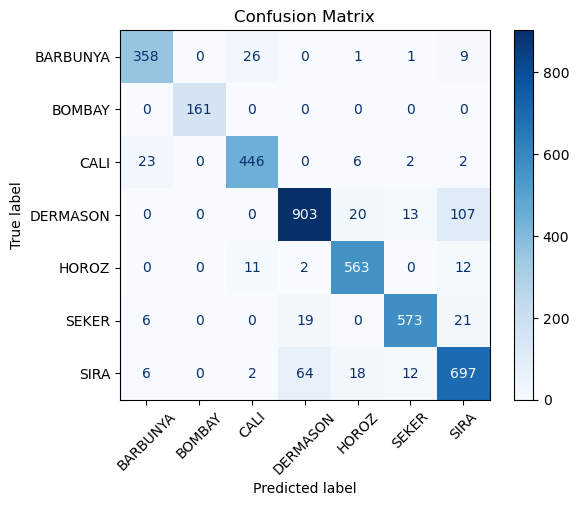

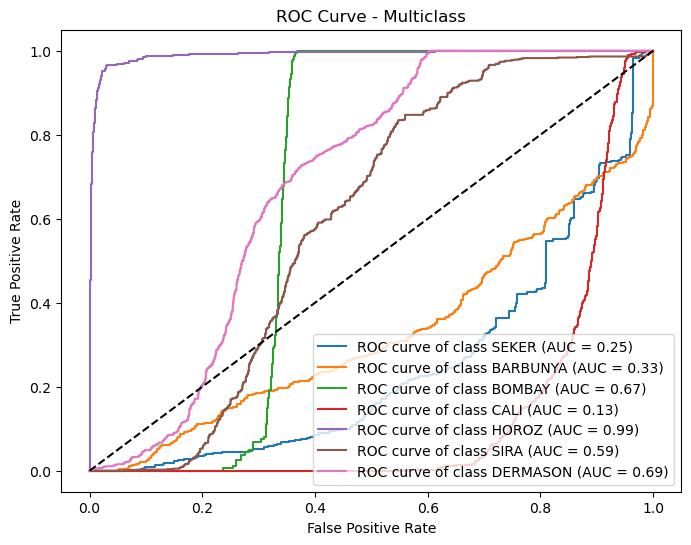

Average AUC: 0.5216121293431039


In [15]:
# Train AdaBoost with specified parameters and use some hints found on the internet
ada_custom = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=200,
    learning_rate=0.5,
    algorithm='SAMME',
    random_state=42
)
ada_custom.fit(X_train, y_train)

# Accuracy on training data
train_accuracy = accuracy_score(y_train, ada_custom.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Accuracy on testing data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Accuracy on the whole dataset
whole_accuracy = accuracy_score(y, ada_custom.predict(X))
print("Whole Dataset Accuracy:", whole_accuracy)

# Classification report on test data
print("Classification Report (Test Data):\n", classification_report(y_test, y_pred))

# Plot confusion matrix
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(ada_custom, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve and calculate average AUC

# Binarize the output for multiclass ROC
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
y_score = ada_custom.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Calculate and print average AUC
average_auc = sum(roc_auc.values()) / len(roc_auc)
print("Average AUC:", average_auc)